In [2]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import joblib
%matplotlib inline


In [3]:
# Loading data
df = pd.read_csv("../Resources/global_air_pollution_dataset.csv")
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [4]:
#Creating correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
AQI Value,1.000000,0.430602,0.405310,0.231758,0.984327
CO AQI Value,0.430602,1.000000,0.145724,0.488092,0.438557
Ozone AQI Value,0.405310,0.145724,1.000000,-0.181818,0.339887
NO2 AQI Value,0.231758,0.488092,-0.181818,1.000000,0.260127
PM2.5 AQI Value,0.984327,0.438557,0.339887,0.260127,1.000000


In [5]:
# Define features set and remove unnecessary columns
dfcopy = df.copy()
columns_to_remove = ["AQI Value", "Country", "City", "AQI Category", "CO AQI Category",
                     "Ozone AQI Category", "NO2 AQI Category", "PM2.5 AQI Category"]           
X = dfcopy.drop(columns=columns_to_remove)
X.head()

,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,1,36,0,51
1,1,5,1,41
2,1,39,2,66
3,1,34,0,20
4,0,22,0,6


In [6]:
# Define target vector
y = df["AQI Category"].ravel()
y[:5]

array(['Moderate', 'Good', 'Moderate', 'Good', 'Good'], dtype=object)

In [7]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [8]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [9]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [10]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [12]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [13]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [14]:
distinct_values = df["AQI Category"].unique()
distinct_values

array(['Moderate', 'Good', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous'], dtype=object)

In [15]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Good", "Actual Moderate", "Actual Unhealthy For Sensitive Groups","Actual Unhealthy", "Actual Very Unhealthy", "Actual Hazardous"], columns=["Predicted Good", "Predicted Moderate", "Predicted Unhealthy For Sensitive Groups", "Predicted Unhealthy", "Predicted Very Unhealthy", "Predicted Hazardous"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.9996590521650187

In [16]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted Good,Predicted Moderate,Predicted Unhealthy For Sensitive Groups,Predicted Unhealthy,Predicted Very Unhealthy,Predicted Hazardous
Actual Good,2488,0,0,0,0,0
Actual Moderate,0,53,0,0,0,1
Actual Unhealthy For Sensitive Groups,0,0,2300,0,0,0
Actual Unhealthy,0,0,0,576,0,0
Actual Very Unhealthy,0,0,0,0,385,0
Actual Hazardous,0,1,0,0,0,62


Accuracy Score : 0.9996590521650187
Classification Report
                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      2488
                     Hazardous       0.98      0.98      0.98        54
                      Moderate       1.00      1.00      1.00      2300
                     Unhealthy       1.00      1.00      1.00       576
Unhealthy for Sensitive Groups       1.00      1.00      1.00       385
                Very Unhealthy       0.98      0.98      0.98        63

                      accuracy                           1.00      5866
                     macro avg       0.99      0.99      0.99      5866
                  weighted avg       1.00      1.00      1.00      5866



In [17]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.8467633796071337, 'PM2.5 AQI Value'),
 (0.07978466120214603, 'Ozone AQI Value'),
 (0.066161672164175, 'CO AQI Value'),
 (0.007290287026545319, 'NO2 AQI Value')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

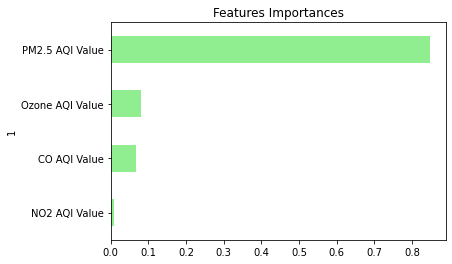

In [18]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

[Text(0.4583956530040733, 0.96875, 'X[0] <= 0.09\ngini = 0.652\nsamples = 11110\nvalue = [7457, 119, 6924, 1665, 1224, 208]'),
 Text(0.09385342413441955, 0.90625, 'X[3] <= -0.328\ngini = 0.567\nsamples = 8552\nvalue = [7362, 82, 5026, 548, 504, 72]'),
 Text(0.016293279022403257, 0.84375, 'X[0] <= -0.541\ngini = 0.045\nsamples = 4739\nvalue = [7362, 0, 170, 0, 2, 0]'),
 Text(0.008146639511201629, 0.78125, 'gini = 0.0\nsamples = 1199\nvalue = [1888, 0, 0, 0, 0, 0]'),
 Text(0.024439918533604887, 0.78125, 'X[1] <= 0.552\ngini = 0.059\nsamples = 3540\nvalue = [5474, 0, 170, 0, 2, 0]'),
 Text(0.016293279022403257, 0.71875, 'gini = 0.0\nsamples = 3435\nvalue = [5474, 0, 0, 0, 0, 0]'),
 Text(0.032586558044806514, 0.71875, 'X[1] <= 2.726\ngini = 0.023\nsamples = 105\nvalue = [0, 0, 170, 0, 2, 0]'),
 Text(0.024439918533604887, 0.65625, 'gini = 0.0\nsamples = 104\nvalue = [0, 0, 170, 0, 0, 0]'),
 Text(0.04073319755600815, 0.65625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 2, 0]'),
 Text(0.17

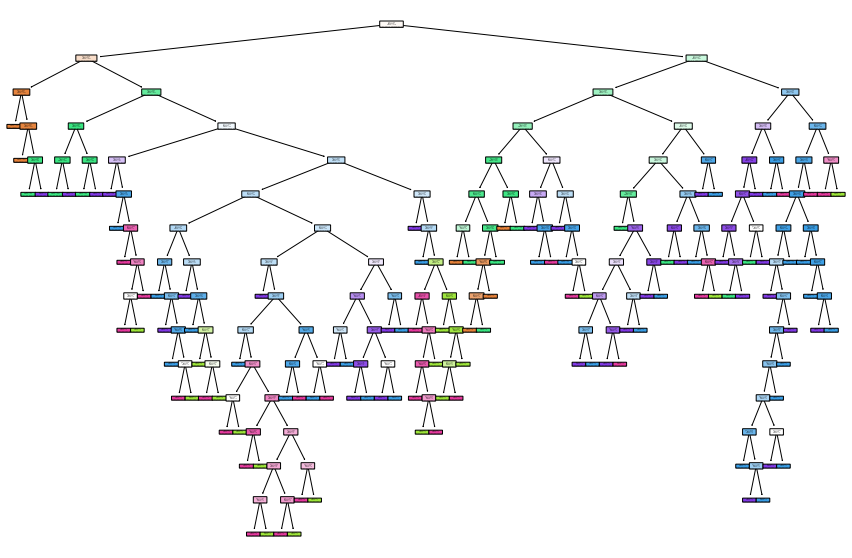

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(15, 10))
plot_tree(rf_model.estimators_[0],
          filled=True, impurity=True,
          rounded=True)

Optimizing Model

In [20]:
dfcopy2 = df.copy()
columns_to_remove = ["AQI Value", "Country", "City", "AQI Category", "CO AQI Category",
                     "Ozone AQI Category", "NO2 AQI Category", "NO2 AQI Value", "PM2.5 AQI Category"]
X = dfcopy.drop(columns=columns_to_remove)
X.head()

,CO AQI Value,Ozone AQI Value,PM2.5 AQI Value
0,1,36,51
1,1,5,41
2,1,39,66
3,1,34,20
4,0,22,6


In [21]:
# Calculating the confusion matrix with removing NO2 AQI Value
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Good", "Actual Moderate", "Actual Unhealthy For Sensitive Groups","Actual Unhealthy", "Actual Very Unhealthy", "Actual Hazardous"], columns=["Predicted Good", "Predicted Moderate", "Predicted Unhealthy For Sensitive Groups", "Predicted Unhealthy", "Predicted Very Unhealthy", "Predicted Hazardous"]
)

# Calculating the accuracy score with removing NO2 AQI Value
acc_score = accuracy_score(y_test, predictions)
acc_score

0.9996590521650187

In [22]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.07978466120214603, 'Ozone AQI Value'),
 (0.066161672164175, 'CO AQI Value'),
 (0.007290287026545319, 'PM2.5 AQI Value')]

In [23]:
from joblib import dump
dump(rf_model, 'rf_model.pkl') 

['rf_model.pkl']

In [24]:
acc_score

0.9996590521650187